# Linear Regression Using TensorFlow in Python By Seth Setse


### Import Statements | Format Maps to SVG

In [1]:
import tensorflow as tf
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
import matplotlib

%config InlineBackend.figue_format = 'svg'

## Disable Warnings
tf.logging.set_verbosity(tf.logging.ERROR)

#### An epoch is one complete iteratoin of the training data.
#### Epoch is a measure of the number of times all of the training vectors are used once to update the weights

In [2]:
## Setup Hyper-Parameters
learning_rate = 0.01
epochs = 200

#### numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)

* Return evenly spaced numbers over a specified interval.

#### Train y has slope 3 and added variance

#### np.random.randn - Creates an array of size n_samples filled with random floating-point samples from the standard normal distribution. So the mean of the array is 0.

In [3]:
n_samples = 30
train_x = np.linspace(0,20,n_samples) # Array
train_y = 3 * train_x + (4 * np.random.randn(n_samples))

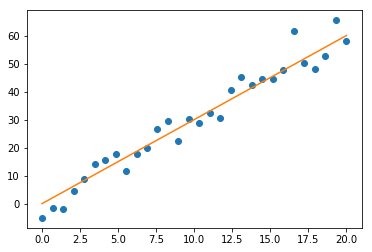

In [4]:
plt.plot(train_x, train_y, 'o')
plt.plot(train_x, 3 * train_x)
plt.show()

### We use the cost function to measure how close the predicted values are to their corresponding real values. We want to reduce the value of the cost function over time.

* In Machine Learning, The Coefficients of the Independent variables are called Weights
* The independent variables(x) are called features
* In machine learning we can call intercepts bias. Bias offsets all predictions that we make.

In [5]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)


W = tf.Variable(np.random.randn(), name='weights')
B = tf.Variable(np.random.randn(), name='bias')

In [6]:
W

<tf.Variable 'weights:0' shape=() dtype=float32_ref>

### We use the Gradient Descent Optimization Algorithm to minimize the cost. The algorithm moves in the direction of the steepest descent or the negative of the gradient. 
* The gradient of a function is a vector that contains the partial derivatives of the function. The gradient is recalculated after each step is taken

### The learning rate is the size of the steps taken in the algorithm, or how far we go in the direction of the steepest descent in this case

* With a high learning rate we can cover more ground each step, but we risk overshooting the lowest point since the slope of the hill is constantly changing. With a very low learning rate, we can confidently move in the direction of the negative gradient since we are recalculating it so frequently. A low learning rate is more precise, but calculating the gradient is time-consuming, so it will take us a very long time to get to the bottom.

In [7]:
pred = X * W + B
# pred = tf.add(tf.multiply(X,W),B)

## Cost function
cost = tf.reduce_sum((pred - Y) ** 2) / (2 * n_samples)

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [8]:
init = tf.global_variables_initializer()

epoch:    0 c=53.0243 w=2.1586 b=1.1438
epoch:   20 c=9.1059 w=2.9716 b=1.0780
epoch:   40 c=9.0219 w=2.9798 b=0.9509
epoch:   60 c=8.9463 w=2.9875 b=0.8303
epoch:   80 c=8.8782 w=2.9949 b=0.7158
epoch:  100 c=8.8169 w=3.0019 b=0.6071
epoch:  120 c=8.7617 w=3.0085 b=0.5040
epoch:  140 c=8.7121 w=3.0148 b=0.4061
epoch:  160 c=8.6674 w=3.0208 b=0.3132
epoch:  180 c=8.6271 w=3.0265 b=0.2250

Optimization Complete!
Trained Cost =8.5926 Trained Weight=3.0316 Trained Bias =0.1453


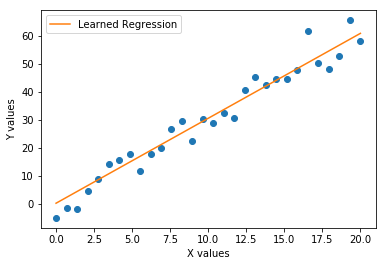

In [9]:
#With statement ensures code cleanup. Calls the exit method on variable even if an error occurs.Used to replace a try-finally
with tf.Session() as sesh:
    sesh.run(init)
    
    # Set how often to show progress
    display_rate = 1
    
    #Calculate number of frames for total animation
    num_plots = math.floor(epochs/display_rate)
    # Setup variables for storing the weight and bias from each epoch
    store_weight = np.zeros(num_plots) #initialize func with zeros
    store_bias = np.zeros(num_plots)
    store_index = 0
    
    for epoch in range(epochs):
        for x, y in zip(train_x, train_y): ## Zip function combines two iterable lists into a tuple
            sesh.run(optimizer, feed_dict ={X: x, Y: y})
        
        if not (epoch) % 20 :
            c = sesh.run(cost, feed_dict={X: train_x, Y: train_y}) ## Calculates the cost of the current epoch
            w = sesh.run(W)
            b = sesh.run(B)
            print(f'epoch: {epoch:4d} c={c:.4f} w={w:.4f} b={b:.4f}')
        
        if not (epoch + 1) % display_rate:
            w = sesh.run(W)
            b = sesh.run(B)        
            #Save the data for the current epoch for later animation
            store_weight[store_index] = w
            store_bias[store_index] = b
            store_index += 1
        
    print("\nOptimization Complete!")
    c = sesh.run(cost, feed_dict={X: train_x, Y: train_y})
    weight = sesh.run(W)
    bias = sesh.run(B)
    
    #Plot the final graph
    print(f'Trained Cost ={c:.4f} Trained Weight={w:.4f} Trained Bias ={b:.4f}')
    plt.ylabel("Y values")
    plt.xlabel("X values")
    plt.plot(train_x, train_y, 'o')
    plt.plot(train_x, weight * train_x + bias, label="Learned Regression")
    plt.legend(loc='upper left')
    plt.show()

### The gradient descent algorithm calculates the partial derivative of each weight in the cost function.  That tells the algorithm how far away each weight is from the correct value, the function takes a step in that direction and updates w and b. Then a new cost is calculated and the function is re-run. 

This link helped:  https://www.kdnuggets.com/2017/04/simple-understand-gradient-descent-algorithm.html



The code below sets up an animation for the linear regression

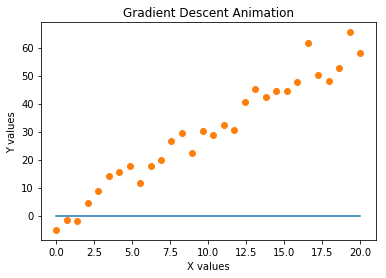

In [11]:
fig, ax = plt.subplots()
line, =  ax.plot(train_x, train_y)

plt.title("Gradient Descent Animation")
plt.ylabel("Y values")
plt.xlabel("X values")
plt.plot(train_x, train_y, 'o')

def animate(i):
    line.set_xdata(train_x)
    line.set_ydata(store_weight[i] * train_x + store_bias[i])
    return line,

def initAnim():
    line.set_ydata(np.zeros(shape=train_y.shape[0])) ##train_y.shape() gets the number of elements in train_y
    return line,

plt.rcParams["animation.html"] = "jshtml"
ani = animation.FuncAnimation(fig, animate, frames=np.arange(0, store_index), init_func=initAnim, interval=100, blit=True)



In [12]:
HTML(ani.to_jshtml())